# Data Preprocessing

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_excel('DATA FILE 334 (2).xlsx')
df.head()

,Part ID,Planning Leadtime,Order Policy,Order Point,Safety Stock Qty,Fixed Order Qty,Days Of Supply,Minimum Order Qty,Maximum Order Qty,Multiple Order Qty,...,June (2019),July (2019),Aug (2019),Sep (2019),Oct (2019),Nov (2019),Dec (2019),Annual 1,Annual 2,ANNUAL DEMAND
0,1.548500e+05,14,P,NaN,0.0,NaN,30.0,50.0,NaN,NaN,...,7.0,7.0,6.0,6.0,6.0,6.0,6.0,74.0,74.0,74.0
1,3.684600e+06,35,D,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,10.0,4.0,10.0,11.0,11.0,11.0,11.0,118.0,118.0,118.0
2,3.270501e+09,56,P,NaN,NaN,NaN,30.0,25.0,NaN,25.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,57.0,57.0,57.0
3,3.270820e+09,35,P,NaN,NaN,NaN,60.0,NaN,NaN,NaN,...,5.0,4.0,5.0,6.0,5.0,5.0,5.0,57.0,58.0,58.0
4,3.275500e+09,49,P,NaN,NaN,NaN,28.0,12.0,NaN,1.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,52.0,52.0,52.0


In [4]:
print('There are ', len(df), ' rows of data.')


There are  689  rows of data.


In [5]:
demand_start_index = df.columns.get_loc("Jan (2018)")
demand_end_index = df.columns.get_loc("Dec (2019)")

In [10]:
monthly_demand_sum = df.iloc[:, demand_start_index:demand_end_index + 1].sum(axis=0)
date_range_full = pd.date_range(start="2018-01-01", end="2019-12-31", freq='M')


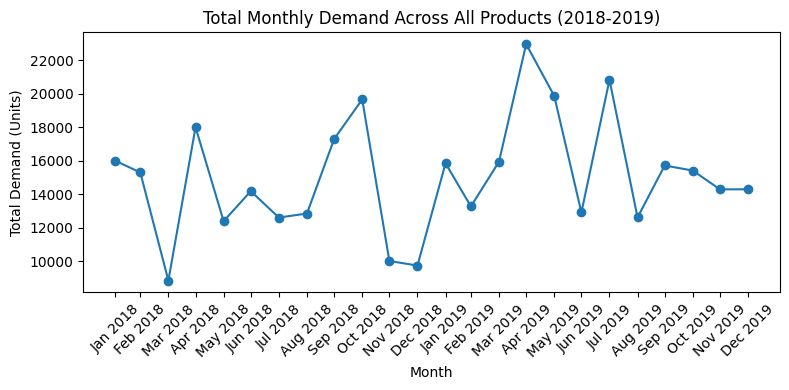

In [15]:
plt.figure(figsize=(8, 4))
plt.plot(date_range_full, monthly_demand_sum, marker='o', linestyle='-')
plt.title('Total Monthly Demand Across All Products (2018-2019)')
plt.xlabel('Month')
plt.ylabel('Total Demand (Units)')
plt.xticks(date_range_full, [d.strftime('%b %Y') for d in date_range_full], rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Assuming df is your DataFrame and 'Coeff_Code' is the column of interest
category_counts = df['Coeff_Code'].value_counts()

# For 'Spiker' and 'Stranger', combine their counts if they exist
spiker_stranger_count = 0
if 'Spiker' in category_counts:
    spiker_stranger_count += category_counts['Spiker']
if 'Stranger' in category_counts:
    spiker_stranger_count += category_counts['Stranger']

# Extract counts for 'Repeater' and 'Runner', default to 0 if they don't exist
repeater_count = category_counts.get('Repeater', 0)
runner_count = category_counts.get('Runner', 0)

print(f"Repeater count: {repeater_count}")
print(f"Runner count: {runner_count}")
print(f"Spiker/Stranger count: {spiker_stranger_count}")


Repeater count: 73
Runner count: 41
Spiker/Stranger count: 575
